In [1]:
# Last-Mile Logistics for Nuh Village in India

# 1. Imports and Settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
# OSMnx settings
import osmnx as ox
ox.settings.use_cache = True
ox.settings.log_console = False

In [3]:
# Create outputs folder
os.makedirs('outputs', exist_ok=True)

In [4]:
# 2. Sample Nuh Village Data
villages = pd.DataFrame({
    'village': ['Nuh1', 'Nuh2', 'Nuh3', 'Nuh4', 'Nuh5', 'Nuh6', 'Nuh7', 'Nuh8', 'Nuh9', 'Nuh10'],
    'lat': [28.123, 28.130, 28.140, 28.145, 28.150, 28.155, 28.160, 28.165, 28.170, 28.175],
    'lon': [77.080, 77.085, 77.090, 77.095, 77.100, 77.105, 77.110, 77.115, 77.120, 77.125]
})

In [5]:
# 3. Folium Map of Villages
m = folium.Map(location=[28.14, 77.10], zoom_start=12)
for idx, row in villages.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)
m.save('outputs/nuh_villages_map.html')

In [6]:
# 4. Clustering (KMeans)
from sklearn.cluster import KMeans
coords = villages[['lat','lon']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(coords)
villages['cluster'] = kmeans.labels_

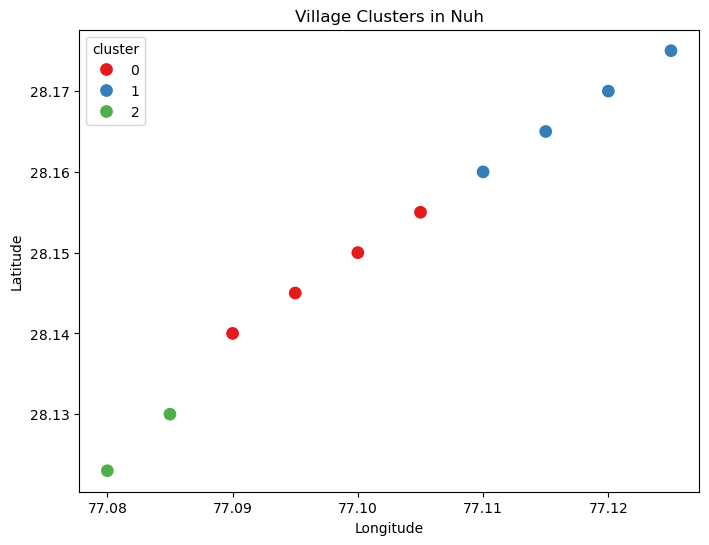

In [7]:
# Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='lon', y='lat', hue='cluster', palette='Set1', data=villages, s=100)
plt.title('Village Clusters in Nuh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('outputs/nuh_clusters.png')
plt.show()

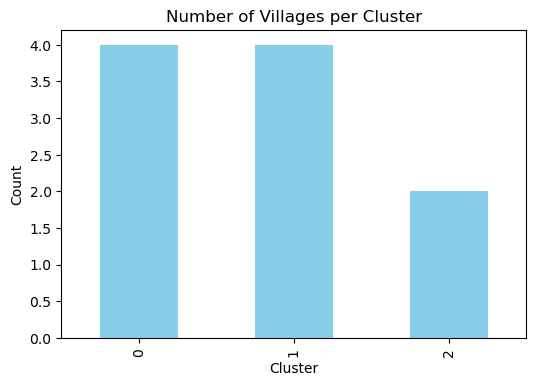

In [8]:
# Cluster Count Bar Chart
plt.figure(figsize=(6,4))
villages['cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Villages per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.savefig('outputs/nuh_cluster_count.png')
plt.show()

In [9]:
# 5. Routing Graph (NetworkX)
G = nx.complete_graph(len(villages))
for i in G.nodes:
    G.nodes[i]['pos'] = (villages.loc[i,'lat'], villages.loc[i,'lon'])

# Add distance as weight
for u,v in G.edges:
    lat1, lon1 = G.nodes[u]['pos']
    lat2, lon2 = G.nodes[v]['pos']
    G.edges[u,v]['weight'] = np.sqrt((lat1-lat2)**2 + (lon1-lon2)**2)

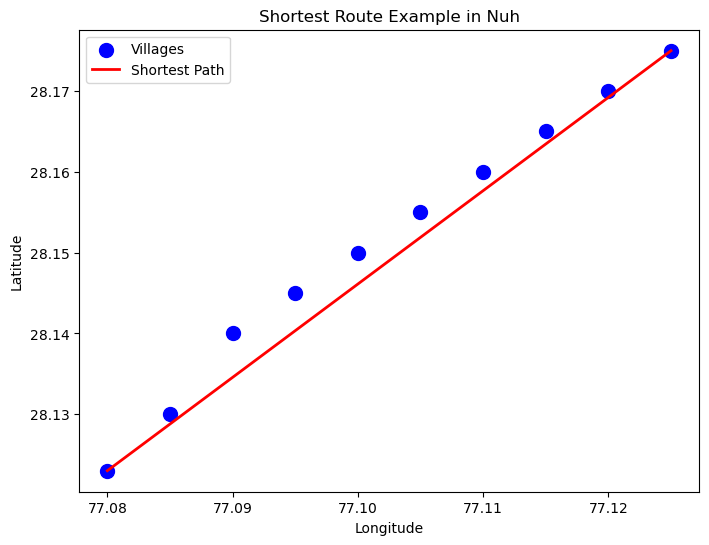

In [10]:
# Shortest path example from first to last village
path = nx.shortest_path(G, source=0, target=9, weight='weight')
path_coords = [G.nodes[i]['pos'] for i in path]
path_lats, path_lons = zip(*path_coords)

plt.figure(figsize=(8,6))
plt.scatter(villages['lon'], villages['lat'], c='blue', s=100, label='Villages')
plt.plot(path_lons, path_lats, c='red', linewidth=2, label='Shortest Path')
plt.title('Shortest Route Example in Nuh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('outputs/nuh_shortest_path.png')
plt.show()

In [11]:
# 6. Delhivery Sample Data 
delhivery_data = pd.DataFrame({
    'origin_pincode':[110001,110002,110003,110004,110005],
    'destination_pincode':[110010,110011,110012,110013,110014],
    'distance_km':[10,20,15,25,30],
    'weight_kg':[2,5,3,7,1],
    'delivery_time_hr':[1,3,2,4,1]
})

In [12]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = delhivery_data[['distance_km','weight_kg']]
y = delhivery_data['delivery_time_hr']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

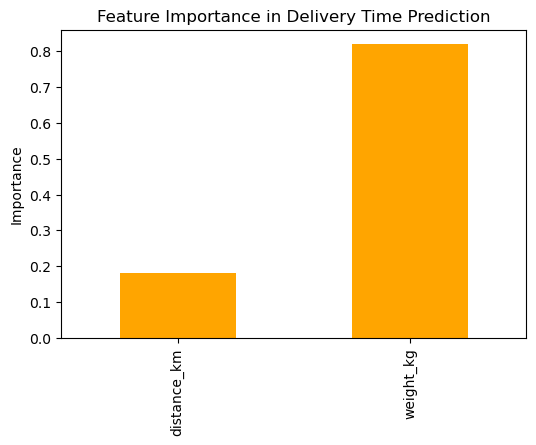

In [13]:
# Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
feat_imp.plot(kind='bar', title='Feature Importance in Delivery Time Prediction', color='orange')
plt.ylabel('Importance')
plt.savefig('outputs/nuh_feature_importance.png')
plt.show()

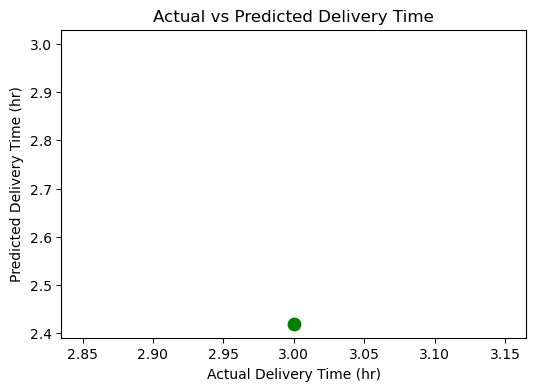

In [14]:
# Scatter plot predicted vs actual
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='green', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (hr)')
plt.ylabel('Predicted Delivery Time (hr)')
plt.title('Actual vs Predicted Delivery Time')
plt.savefig('outputs/nuh_actual_vs_pred.png')
plt.show()

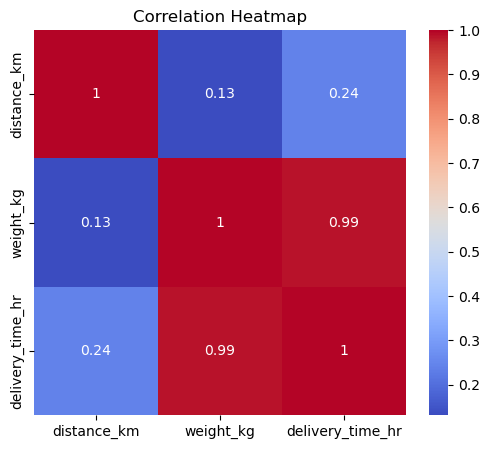

In [15]:
# 7. Heatmap of distances
plt.figure(figsize=(6,5))
sns.heatmap(delhivery_data[['distance_km','weight_kg','delivery_time_hr']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('outputs/nuh_correlation_heatmap.png')
plt.show()

In [34]:
# 8. Save processed datasets
villages.to_csv('outputs/nuh_villages.csv', index=False)
delhivery_data.to_csv('outputs/nuh_delhivery_sample.csv', index=False)